In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns
import sys
import os
from cnmf import cNMF

from fastcluster import linkage
from scipy.cluster.hierarchy import leaves_list
from matplotlib import gridspec


sys.path.append('../../../Code/')
from utils import read_dataset_log, ttest_paired_allcols, compute_smooth_scatter_color

In [2]:
from matplotlib import rcParams, font_manager

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
figdir = '../../../Figures/Components'

## Make UMAP plots

In [4]:
meta = pd.read_csv('../../../Data/PerDataset/Stimseq/stimseq.pilot2.metadata.tsv', sep='\t', index_col=0)
umap = pd.read_csv('../../../Data/PerDataset/Stimseq/stimseq.pilot2.RNA_and_ADT.TP10K.VarNorm.HVG.HarmonyGeneCorrect.WNN.UMAP.tsv', sep='\t', index_col=0)
gating = pd.read_csv('../../../Data/PerDataset/Stimseq/ManualGating.Magic.FinalLabel.20230831.tsv', sep='\t', index_col=0)['0']

/tmp/ipykernel_138117/1947728986.py:1: DtypeWarning: Columns (2,26) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('../../../Data/PerDataset/Stimseq/stimseq.pilot2.metadata.tsv', sep='\t', index_col=0)


In [5]:
umap.shape, gating.shape, meta.shape

((42370, 2), (43222,), (42370, 74))

In [6]:
umap.index == meta.index

array([ True,  True,  True, ...,  True,  True,  True])

In [5]:
gating = gating.loc[umap.index]

In [6]:
import matplotlib.patches as patches

In [7]:
meta['Sort_Status'] = meta['Sort_Status'].replace({'U':'M'})

"\nlw=.5\nlc = '.5'\nleg_ax.hlines(.35, .1, .5, lw=lw, color=lc)\nleg_ax.hlines(.65, .1, .5, lw=lw, color=lc)\nleg_ax.vlines(.1, .35, .65, lw=lw, color=lc)\nleg_ax.vlines(.5, .35, .65, lw=lw, color=lc)\n"

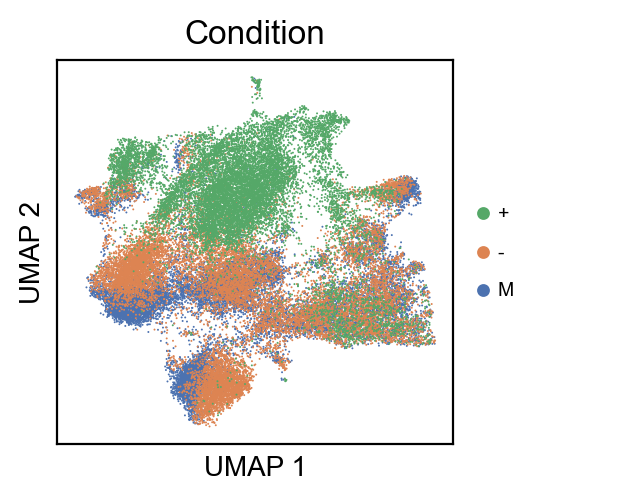

In [15]:
umap_dim = 2.0
leg_dim = .75

right = 1
left = .1
bottom = .1
top = .9

figwidth = (umap_dim+leg_dim)*(1+left)
figheight = umap_dim*(1+bottom+(1-top))


lab_fs = 9
leg_fs = 7
s=.5

fig = plt.figure(constrained_layout=False, figsize=(figwidth, figheight), dpi=200)
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[umap_dim, leg_dim],
                       bottom=bottom, left=left, right=right, top=top,  wspace=0)

umap_ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[], frame_on=True)
leg_ax = fig.add_subplot(gs[1], xticks=[], yticks=[], frame_on=False)

conditions = ['M', '-', '+']

for i,c in enumerate(conditions):
    ind = meta['Sort_Status'] == c
    umap_ax1.scatter(umap.loc[ind, 'WNN_UMAP_1'], umap.loc[ind, 'WNN_UMAP_2'],
                     color=sns.color_palette('deep')[i], label=c, edgecolor='None', s=s)

leg_ax.set_ylim([0, 1])
leg_ax.set_xlim([0, 1])
xpos = .2
for i,ypos in enumerate(np.linspace(.4, .6, len(conditions))):
    leg_ax.scatter(xpos, ypos, label=conditions[i], s=13, color=sns.color_palette('deep')[i])
    leg_ax.text(xpos+.1, ypos, conditions[i], ha='left', va='center', fontsize=leg_fs)

umap_ax1.set_title('Condition')
umap_ax1.set_xlabel('UMAP 1')
umap_ax1.set_ylabel('UMAP 2')

'''
lw=.5
lc = '.5'
leg_ax.hlines(.35, .1, .5, lw=lw, color=lc)
leg_ax.hlines(.65, .1, .5, lw=lw, color=lc)
leg_ax.vlines(.1, .35, .65, lw=lw, color=lc)
leg_ax.vlines(.5, .35, .65, lw=lw, color=lc)
'''

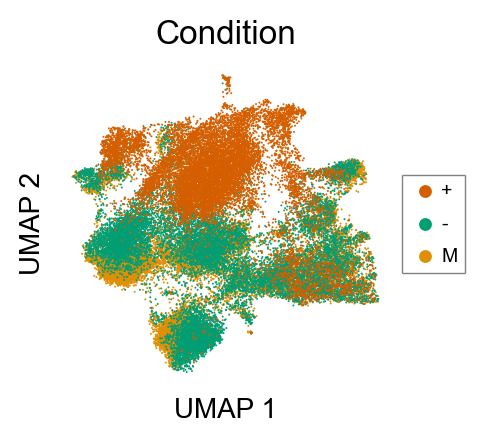

In [16]:
umap_dim = 1.7
leg_dim = .4

right = 1
left = .1
bottom = .1
top = .9

figwidth = (umap_dim+leg_dim)*(1+left)
figheight = umap_dim*(1+bottom+(1-top))


lab_fs = 9
leg_fs = 7
s=.5

fig = plt.figure(constrained_layout=False, figsize=(figwidth, figheight), dpi=200)
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[umap_dim, leg_dim],
                       bottom=bottom, left=left, right=right, top=top,  wspace=0)

umap_ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[], frame_on=False)
leg_ax = fig.add_subplot(gs[1], xticks=[], yticks=[], frame_on=False)

conditions = ['M', '-', '+']

for i,c in enumerate(conditions):
    ind = meta['Sort_Status'] == c
    umap_ax1.scatter(umap.loc[ind, 'WNN_UMAP_1'], umap.loc[ind, 'WNN_UMAP_2'],
                     color=sns.color_palette('colorblind')[i+1], label=c, edgecolor='None', s=s,
                    rasterized=True)

leg_ax.set_ylim([0, 1])
leg_ax.set_xlim([0, 1])
xpos = .4
for i,ypos in enumerate(np.linspace(.4, .6, len(conditions))):
    leg_ax.scatter(xpos, ypos, label=conditions[i], s=13, color=sns.color_palette('colorblind')[i+1])
    leg_ax.text(xpos+.2, ypos, conditions[i], ha='left', va='center', fontsize=leg_fs)

umap_ax1.set_title('Condition')
umap_ax1.set_xlabel('UMAP 1')
umap_ax1.set_ylabel('UMAP 2')


lw=.5
lc = '.5'
leg_ax.hlines(.35, .1, .9, lw=lw, color=lc)
leg_ax.hlines(.65, .1, .9, lw=lw, color=lc)
leg_ax.vlines(.1, .35, .65, lw=lw, color=lc)
leg_ax.vlines(.9, .35, .65, lw=lw, color=lc)

plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Condtion.png'))
plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Condtion.pdf'))


"\nlw=.5\nlc = '.5'\nleg_ax.hlines(0.05, 0.05, 0.95, lw=lw, color=lc)\nleg_ax.hlines(0.95, 0.05, 0.95, lw=lw, color=lc)\nleg_ax.vlines(0.05, 0.05, 0.95, lw=lw, color=lc)\nleg_ax.vlines(0.95, 0.05, 0.95, lw=lw, color=lc)\n"

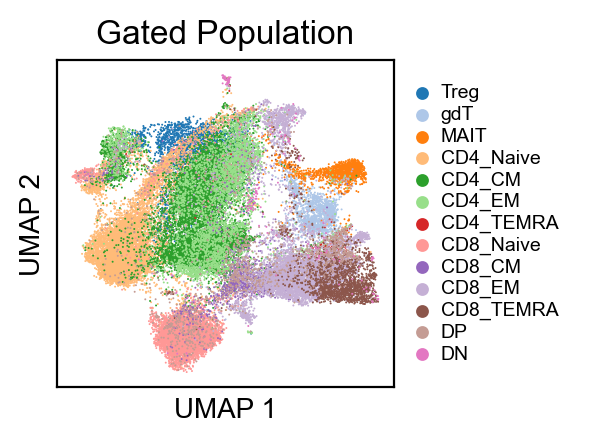

In [17]:
umap_dim = 1.7
leg_dim = .95

right = 1
left = .1
bottom = .1
top = .9

figwidth = (umap_dim+leg_dim)*(1+left)
figheight = umap_dim*(1+bottom+(1-top))


lab_fs = 9
leg_fs = 7
s=.5

fig = plt.figure(constrained_layout=False, figsize=(figwidth, figheight), dpi=200)
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[umap_dim, leg_dim],
                       bottom=bottom, left=left, right=right, top=top,  wspace=0)

umap_ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[], frame_on=True)
leg_ax = fig.add_subplot(gs[1], xticks=[], yticks=[], frame_on=False)

cell_gate = [ 'Treg', 'gdT', 'MAIT', 'CD4_Naive', 'CD4_CM', 'CD4_EM', 'CD4_TEMRA', 'CD8_Naive', 'CD8_CM', 'CD8_EM', 'CD8_TEMRA', 'DP', 'DN', ]

for i,c in enumerate(cell_gate):
    ind = gating == c
    umap_ax1.scatter(umap.loc[ind, 'WNN_UMAP_1'], umap.loc[ind, 'WNN_UMAP_2'], color=sns.color_palette('tab20')[i], label=c, edgecolor='None', s=s)



leg_ax.set_ylim([0, 1])
leg_ax.set_xlim([0, 1])
xpos = .15
for i,ypos in enumerate(np.linspace(.9, .1, len(cell_gate))):
    leg_ax.scatter(xpos, ypos, label=cell_gate[i], s=13, color=sns.color_palette('tab20')[i])
    leg_ax.text(xpos+.1, ypos, cell_gate[i], ha='left', va='center', fontsize=leg_fs)

umap_ax1.set_title('Gated Population')
umap_ax1.set_xlabel('UMAP 1')
umap_ax1.set_ylabel('UMAP 2')

'''
lw=.5
lc = '.5'
leg_ax.hlines(0.05, 0.05, 0.95, lw=lw, color=lc)
leg_ax.hlines(0.95, 0.05, 0.95, lw=lw, color=lc)
leg_ax.vlines(0.05, 0.05, 0.95, lw=lw, color=lc)
leg_ax.vlines(0.95, 0.05, 0.95, lw=lw, color=lc)
'''

In [8]:
pastel_cmap_dict = {
    'CD4 CM': '#4fa3e1',  # Brighter blue
    'CD4 EM': '#ff9e1a',  # Brighter orange
    'CD4 Naive': '#00997d',  # Brighter green
    'CD4 TEMRA': '#e65b5f',  # Brighter red
    'CD8 CM': '#c56bff',  # Brighter purple
    'CD8 EM': '#b29170',  # Brighter brown
    'CD8 Naive': '#e9aaff',  # Brighter pink
    'CD8 TEMRA': '#ffe59a',  # Brighter olive green
    'DN': '#6bd7e5',  # Brighter cyan
    'DP': '#b4c8f2',  # Brighter light blue
    'MAIT': '#ffd39b',  # Brighter peach
    'Treg': '#94c47d',  # Brighter light green
    'gdT': '#fdb4b2',  # Brighter light red
}

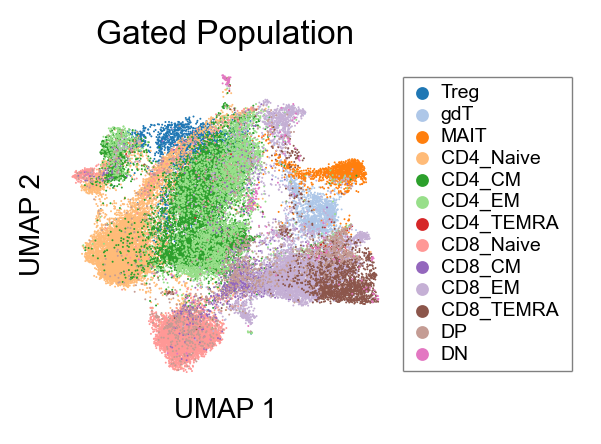

In [18]:
umap_dim = 1.7
leg_dim = .95

right = 1
left = .1
bottom = .1
top = .9

figwidth = (umap_dim+leg_dim)*(1+left)
figheight = umap_dim*(1+bottom+(1-top))


lab_fs = 9
leg_fs = 7
s=.5

fig = plt.figure(constrained_layout=False, figsize=(figwidth, figheight), dpi=200)
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[umap_dim, leg_dim],
                       bottom=bottom, left=left, right=right, top=top,  wspace=0)

umap_ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[], frame_on=False)
leg_ax = fig.add_subplot(gs[1], xticks=[], yticks=[], frame_on=False)

cell_gate = [ 'Treg', 'gdT', 'MAIT', 'CD4_Naive', 'CD4_CM', 'CD4_EM', 'CD4_TEMRA', 'CD8_Naive', 'CD8_CM', 'CD8_EM', 'CD8_TEMRA', 'DP', 'DN', ]

for i,c in enumerate(cell_gate):
    ind = gating == c
    umap_ax1.scatter(umap.loc[ind, 'WNN_UMAP_1'], umap.loc[ind, 'WNN_UMAP_2'], color=sns.color_palette('tab20')[i], label=c, edgecolor='None', s=s,
                    rasterized=True)



leg_ax.set_ylim([0, 1])
leg_ax.set_xlim([0, 1])
xpos = .15
for i,ypos in enumerate(np.linspace(.9, .1, len(cell_gate))):
    leg_ax.scatter(xpos, ypos, label=cell_gate[i], s=13, color=sns.color_palette('tab20')[i])
    leg_ax.text(xpos+.1, ypos, cell_gate[i], ha='left', va='center', fontsize=leg_fs)

umap_ax1.set_title('Gated Population')
umap_ax1.set_xlabel('UMAP 1')
umap_ax1.set_ylabel('UMAP 2')


lw=.5
lc = '.5'
leg_ax.hlines(0.05, 0.05, 0.95, lw=lw, color=lc)
leg_ax.hlines(0.95, 0.05, 0.95, lw=lw, color=lc)
leg_ax.vlines(0.05, 0.05, 0.95, lw=lw, color=lc)
leg_ax.vlines(0.95, 0.05, 0.95, lw=lw, color=lc)

# plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Gating.png'))
# plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Gating.pdf'))


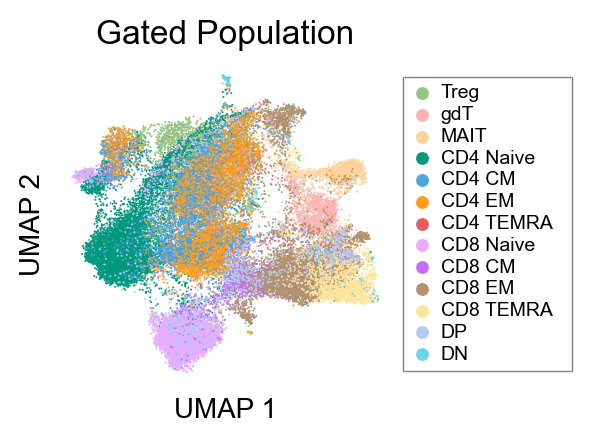

In [18]:
umap_dim = 1.7
leg_dim = .95

right = 1
left = .1
bottom = .1
top = .9

figwidth = (umap_dim+leg_dim)*(1+left)
figheight = umap_dim*(1+bottom+(1-top))


lab_fs = 9
leg_fs = 7
s=.5

fig = plt.figure(constrained_layout=False, figsize=(figwidth, figheight), dpi=200)
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[umap_dim, leg_dim],
                       bottom=bottom, left=left, right=right, top=top,  wspace=0)

umap_ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[], frame_on=False)
leg_ax = fig.add_subplot(gs[1], xticks=[], yticks=[], frame_on=False)

cell_gate = [ 'Treg', 'gdT', 'MAIT', 'CD4_Naive', 'CD4_CM', 'CD4_EM', 'CD4_TEMRA', 'CD8_Naive', 'CD8_CM', 'CD8_EM', 'CD8_TEMRA', 'DP', 'DN', ]

for i,c in enumerate(cell_gate):
    ind = gating == c
    umap_ax1.scatter(umap.loc[ind, 'WNN_UMAP_1'], umap.loc[ind, 'WNN_UMAP_2'], 
                     color=pastel_cmap_dict[c.replace('_', ' ')], label=c.replace('_', ' '), 
                    edgecolor='None', s=s,rasterized=True)



leg_ax.set_ylim([0, 1])
leg_ax.set_xlim([0, 1])
xpos = .15
for i,ypos in enumerate(np.linspace(.9, .1, len(cell_gate))):
    leg_ax.scatter(xpos, ypos, label=cell_gate[i].replace('_', ' '), s=13, 
                   color=pastel_cmap_dict[cell_gate[i].replace('_', ' ')])
    leg_ax.text(xpos+.1, ypos, cell_gate[i].replace('_', ' '), ha='left', va='center', fontsize=leg_fs)

umap_ax1.set_title('Gated Population')
umap_ax1.set_xlabel('UMAP 1')
umap_ax1.set_ylabel('UMAP 2')


lw=.5
lc = '.5'
leg_ax.hlines(0.05, 0.05, 0.95, lw=lw, color=lc)
leg_ax.hlines(0.95, 0.05, 0.95, lw=lw, color=lc)
leg_ax.vlines(0.05, 0.05, 0.95, lw=lw, color=lc)
leg_ax.vlines(0.95, 0.05, 0.95, lw=lw, color=lc)

plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Gating.png'))
plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Gating.pdf'))


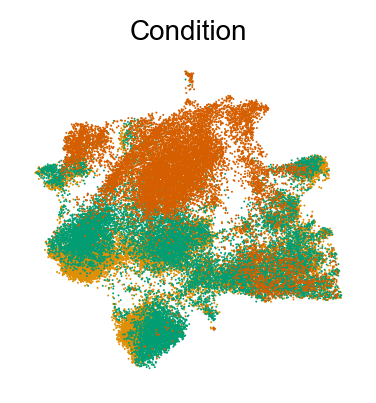

In [19]:
umap_dim = 1.7

right = 1
left = .1
bottom = .1
top = .9

figwidth = (umap_dim )*(1+left)
figheight = umap_dim*(1+bottom+(1-top))


lab_fs = 9
leg_fs = 7
s=.5

fig = plt.figure(constrained_layout=False, figsize=(figwidth, figheight), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, width_ratios=[umap_dim],
                       bottom=bottom, left=left, right=right, top=top,  wspace=0)

umap_ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[], frame_on=False)
umap_ax1.set_title('Condition', fontsize=10)
#umap_ax1.set_xlabel('UMAP 1', fontsize=10)
#umap_ax1.set_ylabel('UMAP 2', fontsize=10)

conditions = ['M', '-', '+']

for i,c in enumerate(conditions):
    ind = meta['Sort_Status'] == c
    umap_ax1.scatter(umap.loc[ind, 'WNN_UMAP_1'], umap.loc[ind, 'WNN_UMAP_2'],
                     color=sns.color_palette('colorblind')[i+1], label=c, edgecolor='None', s=s,
                    rasterized=True)


plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Condtion.Small.png'))
plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Condtion.Small.pdf'))


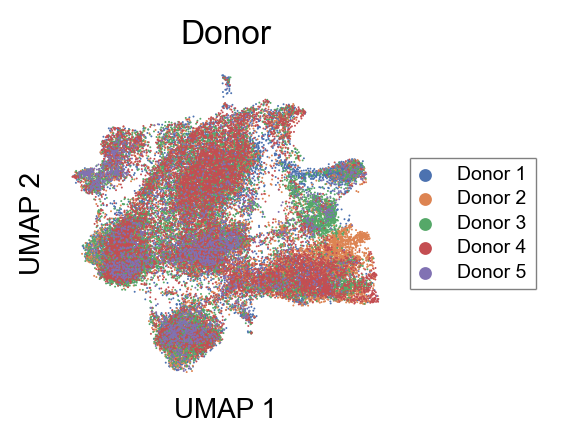

In [37]:
umap_dim = 1.7
leg_dim = .8

right = 1
left = .1
bottom = .1
top = .9

figwidth = (umap_dim+leg_dim)*(1+left)
figheight = umap_dim*(1+bottom+(1-top))


lab_fs = 9
leg_fs = 7
s=.5

fig = plt.figure(constrained_layout=False, figsize=(figwidth, figheight), dpi=200)
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[umap_dim, leg_dim],
                       bottom=bottom, left=left, right=right, top=top,  wspace=0)

umap_ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[], frame_on=False)
leg_ax = fig.add_subplot(gs[1], xticks=[], yticks=[], frame_on=False)


leg_ax.set_ylim([0, 1])
leg_ax.set_xlim([0, 1])
xpos = .4


donor = [10042029, 10057029, 10049452, 10033066, 10041243]
donorname = ['Donor 1', 'Donor 2', 'Donor 3', 'Donor 4', 'Donor 5']

for i,c in enumerate(donor):
    ind = meta['Biobank_ID'] == c
    umap_ax1.scatter(umap.loc[ind, 'WNN_UMAP_1'], umap.loc[ind, 'WNN_UMAP_2'],
                     color=sns.color_palette('deep')[i], label=donorname[i], edgecolor='None', s=s,
                    rasterized=True)
    
    
leg_ax.set_ylim([0, 1])
leg_ax.set_xlim([0, 1])
xpos = .2
for i,ypos in enumerate(np.linspace(.65, .35, len(donor))):
    leg_ax.scatter(xpos, ypos, label=conditions[i], s=13, color=sns.color_palette('deep')[i])
    leg_ax.text(xpos+.2, ypos, donorname[i], ha='left', va='center', fontsize=leg_fs)
    
    
    
umap_ax1.set_title('Donor')
umap_ax1.set_xlabel('UMAP 1')
umap_ax1.set_ylabel('UMAP 2')


lw=.5
lc = '.5'
leg_ax.hlines(.3, .1, .9, lw=lw, color=lc)
leg_ax.hlines(.7, .1, .9, lw=lw, color=lc)
leg_ax.vlines(.1, .3, .7, lw=lw, color=lc)
leg_ax.vlines(.9, .3, .7, lw=lw, color=lc)

plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Donor.png'))
plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Donor.pdf'))


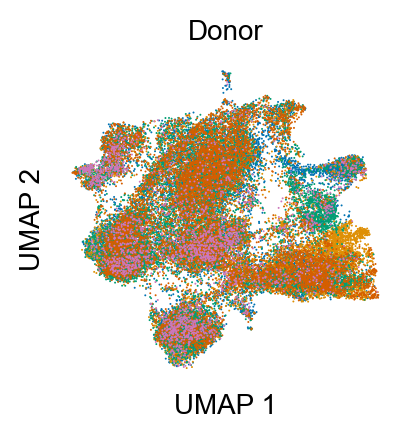

In [36]:
umap_dim = 1.7

right = 1
left = .1
bottom = .1
top = .9

figwidth = (umap_dim )*(1+left)
figheight = umap_dim*(1+bottom+(1-top))


lab_fs = 9
leg_fs = 7
s=.5

fig = plt.figure(constrained_layout=False, figsize=(figwidth, figheight), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, width_ratios=[umap_dim],
                       bottom=bottom, left=left, right=right, top=top,  wspace=0)

umap_ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[], frame_on=False)
umap_ax1.set_title('Donor', fontsize=10)
umap_ax1.set_xlabel('UMAP 1', fontsize=10)
umap_ax1.set_ylabel('UMAP 2', fontsize=10)

conditions = [10042029, 10057029, 10049452, 10033066, 10041243]
donorname = ['Donor 1', 'Donor 2', 'Donor 3', 'Donor 4', 'Donor 4']

for i,c in enumerate(conditions):
    ind = meta['Biobank_ID'] == c
    umap_ax1.scatter(umap.loc[ind, 'WNN_UMAP_1'], umap.loc[ind, 'WNN_UMAP_2'],
                     color=sns.color_palette('colorblind')[i], label=c, edgecolor='None', s=s,
                    rasterized=True)


plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Donor.Small.png'))
plt.savefig(os.path.join(figdir, 'UMAP.Stimseq.Donor.Small.pdf'))

In [19]:
meta['Biobank_ID'].unique()

array([10042029, 10057029, 10049452, 10033066, 10041243])

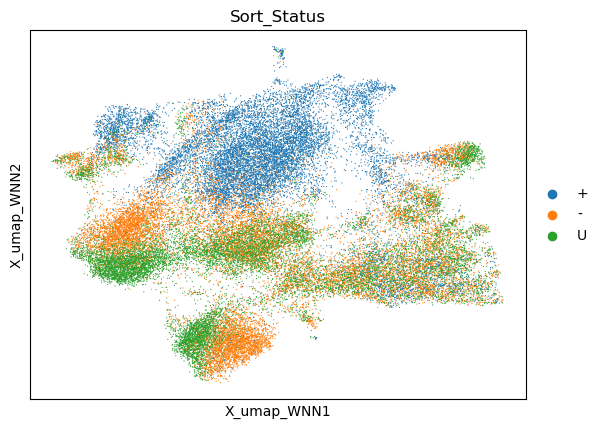

In [13]:
sc.pl.embedding(adata_c, color='Sort_Status', basis='X_umap_WNN')